In [33]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [76]:
from lsst.daf.butler import Butler
import lsst.geom as geom
import astropy.units as u

Load the Butler for the ap_verify run.

In [87]:
b = Butler("/project/morriscb/src/ap_verify_ci_cosmos_pdr2/testMetric/repo",
           collections=["ap_verify-output"])

Grab the data for one of the two CCDs.

In [160]:
diffim = b.get("fakes_deepDiff_differenceExp", visit=59150, detector=50, instrument="HSC")
calexp = b.get("fakes_calexp", visit=59150, detector=50, instrument="HSC")
sources = b.get("fakes_deepDiff_matchDiaSrc", visit=59150, detector=50, instrument="HSC")
comp20 = b.get("metricvalue_ap_pipe_ApFakesCompletenessMag20t22",
               visit=59150, detector=50, instrument="HSC")
comp22 = b.get("metricvalue_ap_pipe_ApFakesCompletenessMag22t24",
               visit=59150, detector=50, instrument="HSC")
comp24 = b.get("metricvalue_ap_pipe_ApFakesCompletenessMag24t26",
               visit=59150, detector=50, instrument="HSC")
calexp.getFilter().getName()

'g'

Check out the current values for the completenss metric.

In [161]:
print(comp20, comp22, comp24)

ap_pipe.ApFakesCompletenessMag20t22: 1.0 ap_pipe.ApFakesCompletenessMag22t24: 0.875 ap_pipe.ApFakesCompletenessMag24t26: 0.8125


In [162]:
insertedMag = []
insertedMagVis = []
insertedMagTemp = []
deltaAp = []
deltaApVisit = []
deltaApTemplate = []
deltaPs = []
deltaPsVisit = []
deltaPsTemplate = []
deltaTot = []
deltaTotVisit = []
deltaTotTemplate = []
for idx, src in sources.iterrows():
    if np.isnan(src["diaObjectId"]):
        continue
    psMag = (np.fabs(src["psFlux"]) * u.nJy).to_value(u.ABmag)
    apMag = (np.fabs(src["apFlux"]) * u.nJy).to_value(u.ABmag)
    totMag =  (np.fabs(src["totFlux"]) * u.nJy).to_value(u.ABmag)
    insertedMag.append(src["gmagVar"])
    deltaPs.append(src["gmagVar"] - psMag)
    deltaAp.append(src["gmagVar"] - apMag)
    deltaTot.append(src["gmagVar"] - totMag)
    if src['isVisitSource']:
        insertedMagVis.append(src["gmagVar"])
        deltaPsVisit.append(src["gmagVar"] - psMag)
        deltaApVisit.append(src["gmagVar"] - apMag)
        deltaTotVisit.append(src["gmagVar"] - totMag)
    if src['isTemplateSource']:
        insertedMagTemp.append(src["gmagVar"])
        deltaPsTemplate.append(src["gmagVar"] - psMag)
        deltaApTemplate.append(src["gmagVar"] - apMag)
        deltaTotTemplate.append(src["gmagVar"] - totMag)

Plot the delta magnitude of inserted minus measured. Tot flux is only really valid for sources insrted into the visit. The tot flux on template inserted objects is basically a measure of sky.

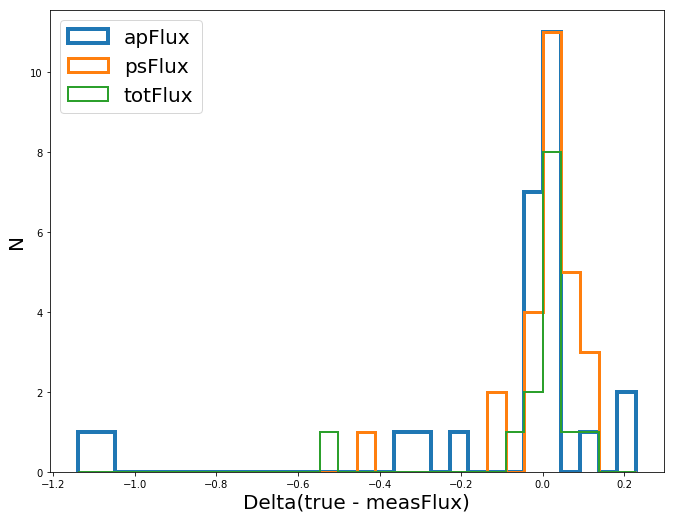

In [163]:
figure(figsize=(11, 8.5))
_, binEdges, _ = hist(deltaAp, bins=30, histtype="step", label="apFlux", lw=4)
_, _, _ = hist(deltaPs, bins=binEdges, histtype="step", label="psFlux", lw=3)
_, _, _ = hist(deltaTot, bins=binEdges, histtype="step", label="totFlux", lw=2)
xlabel("Delta(true - measFlux)", size=20)
ylabel("N", size=20)
legend(loc=2, fontsize=20)

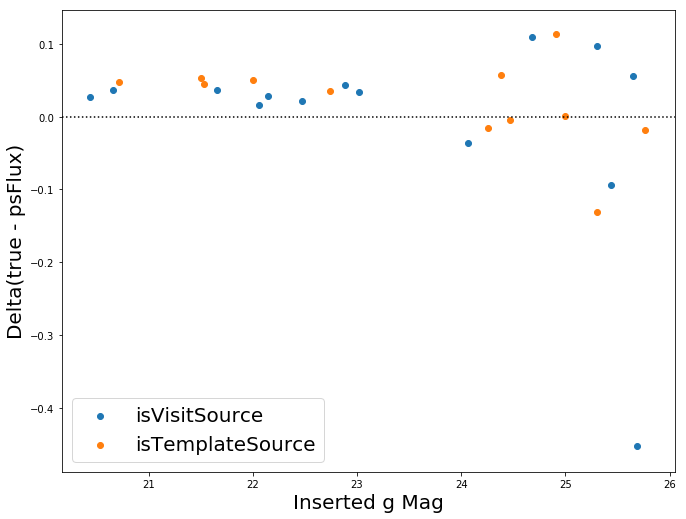

In [164]:
figure(figsize=(11, 8.5))
axhline(0.0, ls=':', color='k')
scatter(insertedMagVis, deltaPsVisit, label="isVisitSource")
scatter(insertedMagTemp, deltaPsTemplate, label="isTemplateSource")
xlabel("Inserted g Mag", size=20)
ylabel("Delta(true - psFlux)", size=20)
legend(loc=0, fontsize=20)

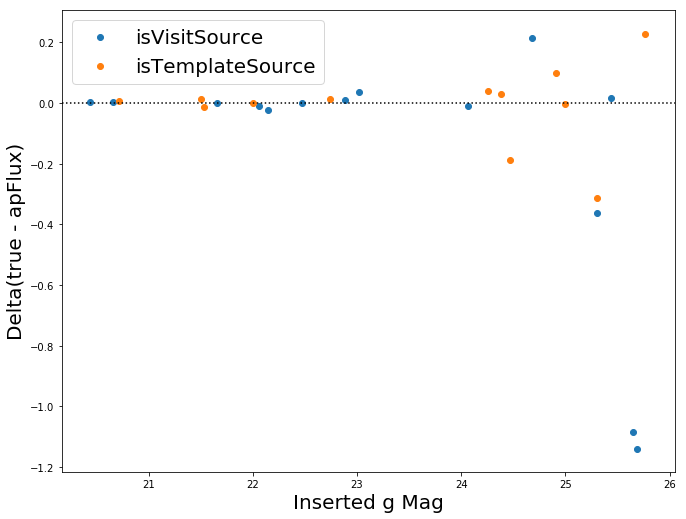

In [165]:
figure(figsize=(11, 8.5))
axhline(0.0, ls=':', color='k')
scatter(insertedMagVis, deltaApVisit, label="isVisitSource")
scatter(insertedMagTemp, deltaApTemplate, label="isTemplateSource")
xlabel("Inserted g Mag", size=20)
ylabel("Delta(true - apFlux)", size=20)
legend(loc=0, fontsize=20)

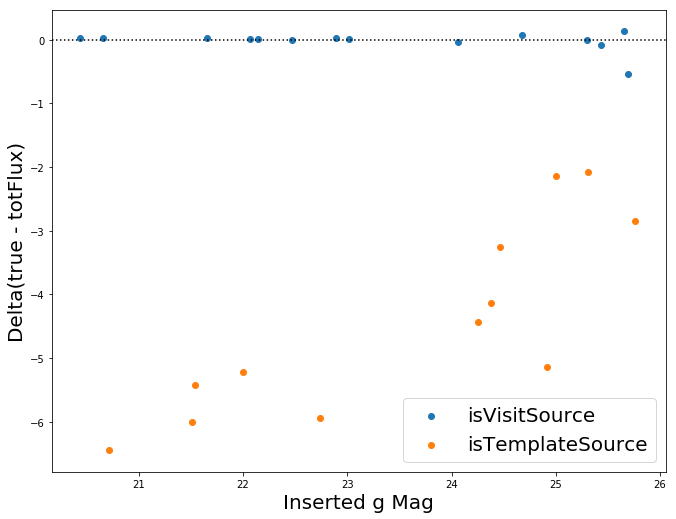

In [166]:
figure(figsize=(11, 8.5))
axhline(0.0, ls=':', color='k')
scatter(insertedMagVis, deltaTotVisit, label="isVisitSource")
scatter(insertedMagTemp, deltaTotTemplate, label="isTemplateSource")
xlabel("Inserted g Mag", size=20)
ylabel("Delta(true - totFlux)", size=20)
legend(loc=0, fontsize=20)

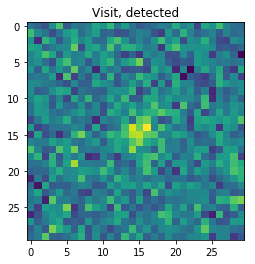

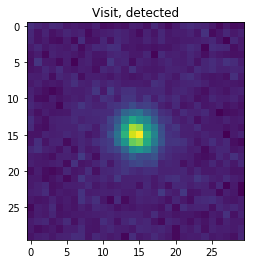

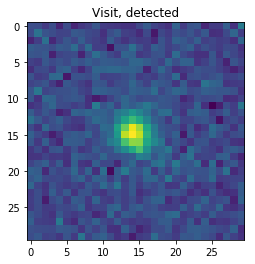

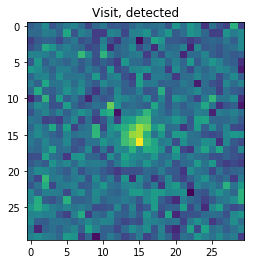

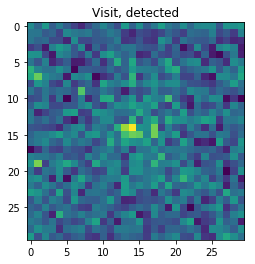

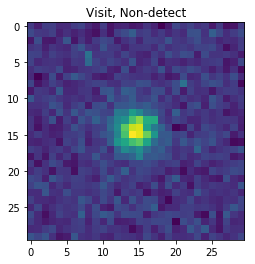

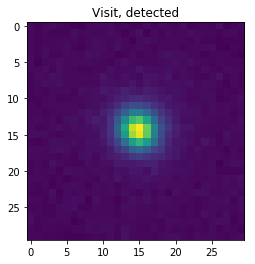

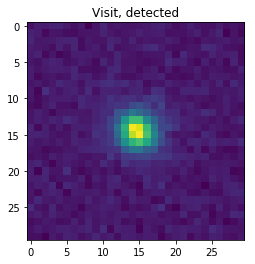

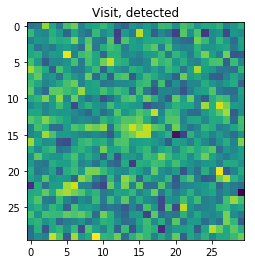

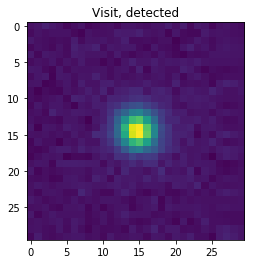

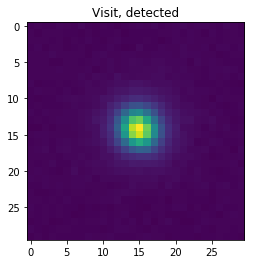

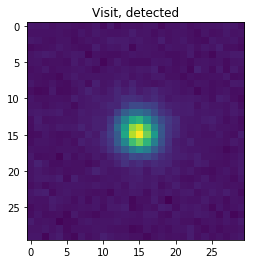

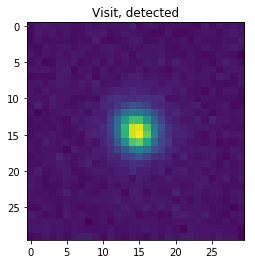

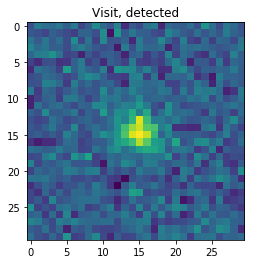

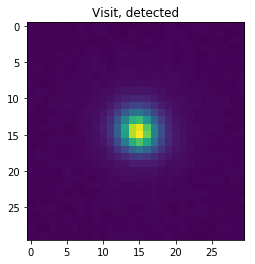

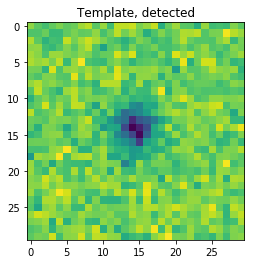

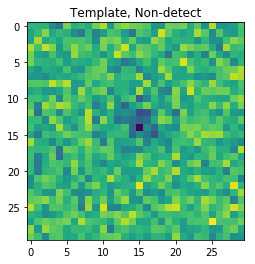

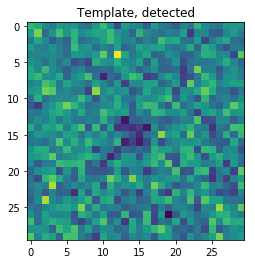

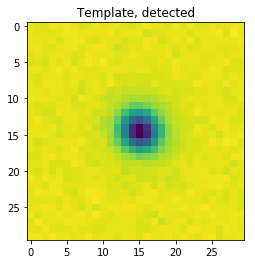

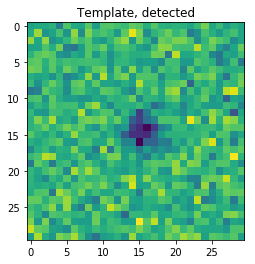

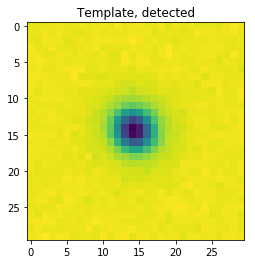

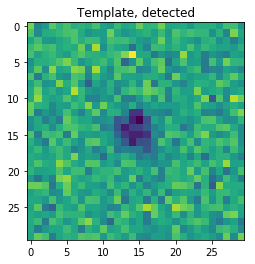

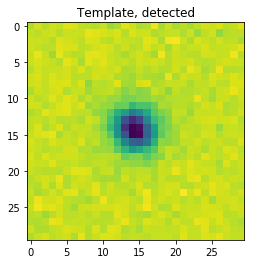

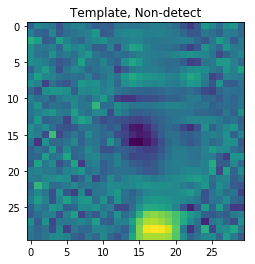

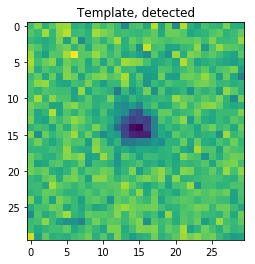

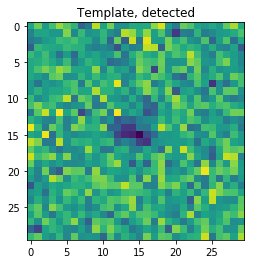

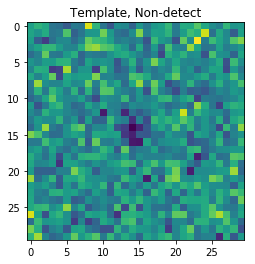

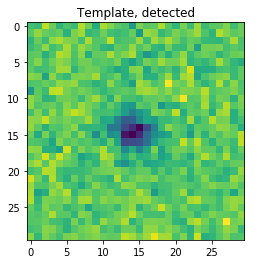

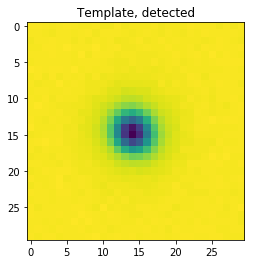

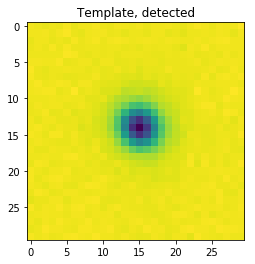

In [167]:
for idx, src in sources.iterrows():
    sphPoint = geom.SpherePoint(src["raJ2000"], src["decJ2000"], geom.radians)
    cutout = diffim.getCutout(sphPoint, geom.Extent2I(30, 30))
    figure()
    if np.isnan(src["diaObjectId"]) and src["isVisitSource"]:
        title("Visit, Non-detect")
    elif not np.isnan(src["diaObjectId"]) and src["isVisitSource"]:
        title("Visit, detected")
    elif np.isnan(src["diaObjectId"]) and src["isTemplateSource"]:
        title("Template, Non-detect")
    elif not np.isnan(src["diaObjectId"]) and src["isTemplateSource"]:
        title("Template, detected")
    imshow(cutout.getImage().array)

Plot the images of the inserted fakes as produce in difference imaging.

ap_pipe.ApFakesCompletenessMag20t22: 0.75 ap_pipe.ApFakesCompletenessMag22t24: 1.0 ap_pipe.ApFakesCompletenessMag24t26: 0.8666666666666667


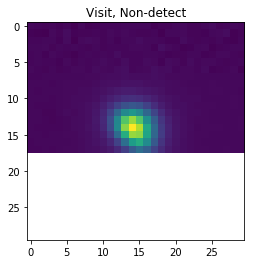

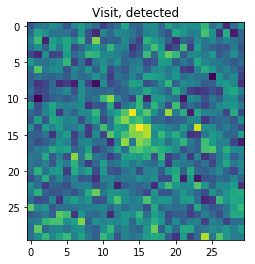

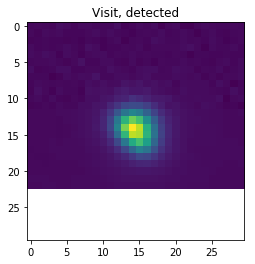

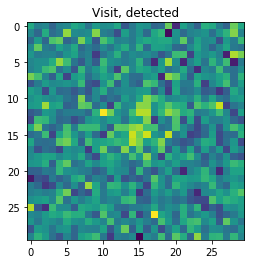

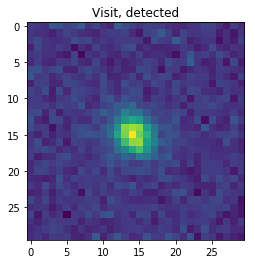

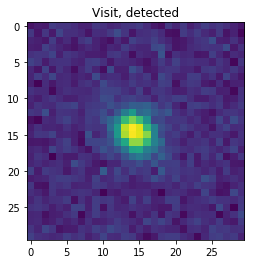

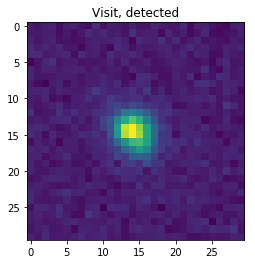

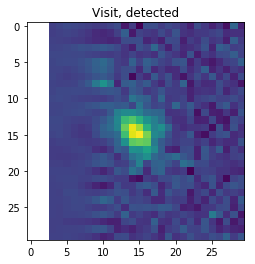

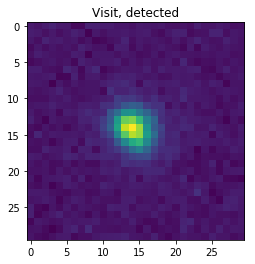

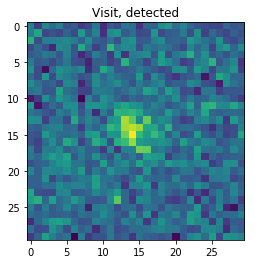

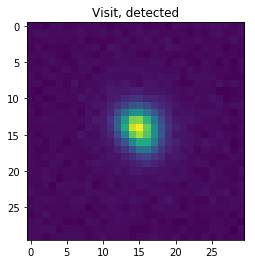

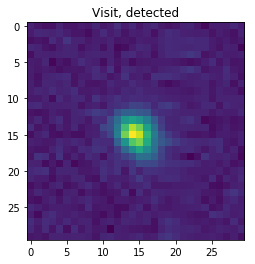

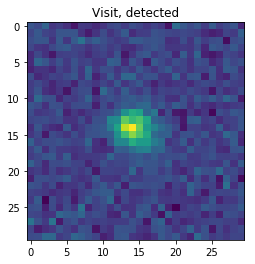

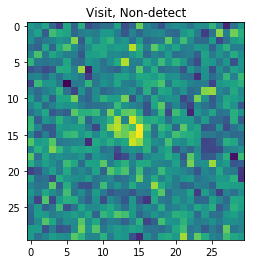

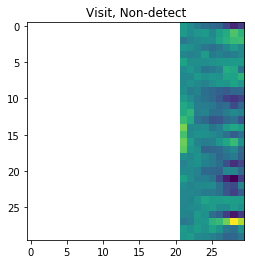

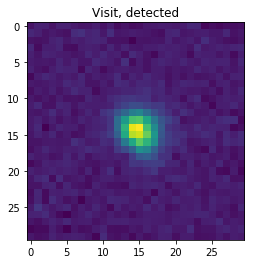

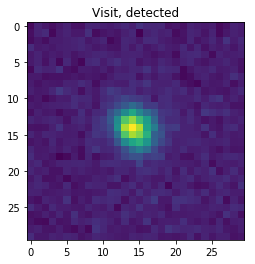

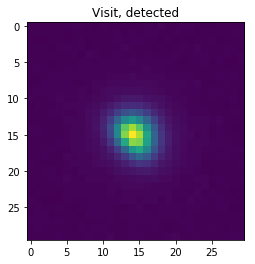

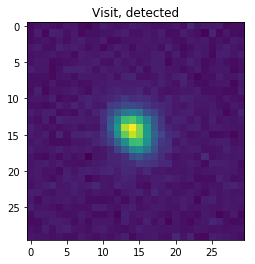

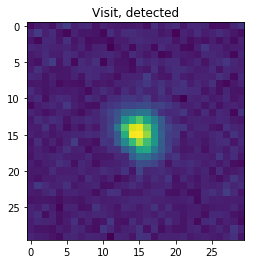

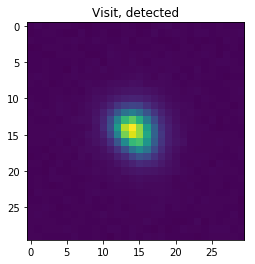

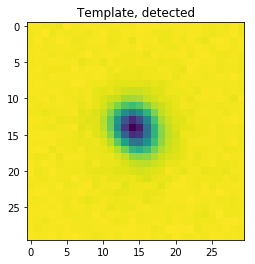

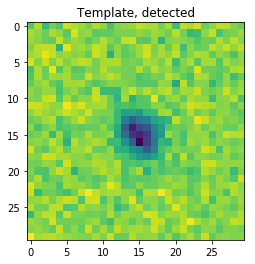

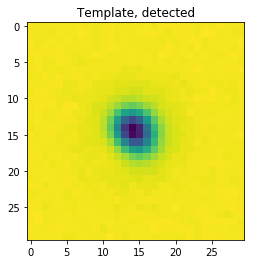

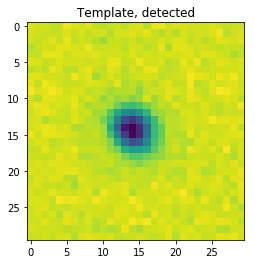

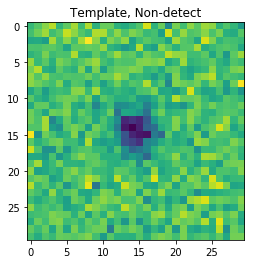

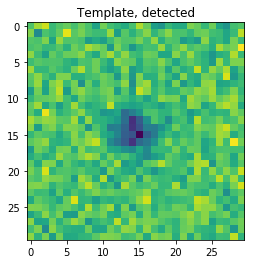

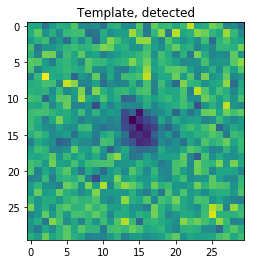

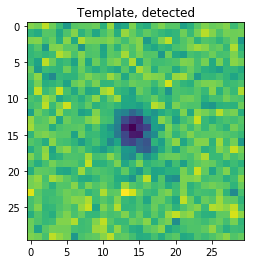

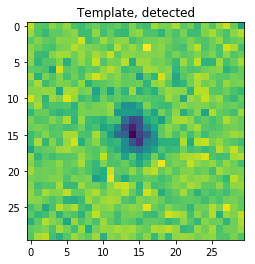

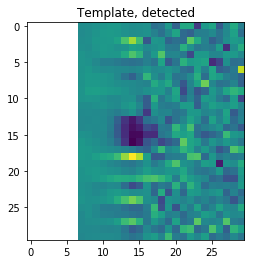

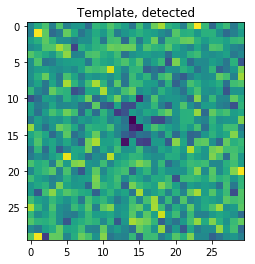

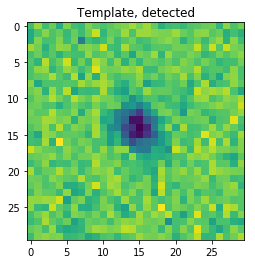

In [ ]:
diffim = b.get("fakes_deepDiff_differenceExp", visit=59160, detector=51, instrument="HSC")
calexp = b.get("fakes_calexp", visit=59160, detector=51, instrument="HSC")
sources = b.get("fakes_deepDiff_matchDiaSrc", visit=59160, detector=51, instrument="HSC")
comp20 = b.get("metricvalue_ap_pipe_ApFakesCompletenessMag20t22",
               visit=59160, detector=51, instrument="HSC")
comp22 = b.get("metricvalue_ap_pipe_ApFakesCompletenessMag22t24",
               visit=59160, detector=51, instrument="HSC")
comp24 = b.get("metricvalue_ap_pipe_ApFakesCompletenessMag24t26",
               visit=59160, detector=51, instrument="HSC")
print(comp20, comp22, comp24)
for idx, src in sources.iterrows():
    sphPoint = geom.SpherePoint(src["raJ2000"], src["decJ2000"], geom.radians)
    cutout = diffim.getCutout(sphPoint, geom.Extent2I(30, 30))
    figure()
    if np.isnan(src["diaObjectId"]) and src["isVisitSource"]:
        title("Visit, Non-detect")
    elif not np.isnan(src["diaObjectId"]) and src["isVisitSource"]:
        title("Visit, detected")
    elif np.isnan(src["diaObjectId"]) and src["isTemplateSource"]:
        title("Template, Non-detect")
    elif not np.isnan(src["diaObjectId"]) and src["isTemplateSource"]:
        title("Template, detected")
    imshow(cutout.getImage().array)
    imshow(cutout.getImage().array)

In [ ]:
insertedMag = []
insertedMagVis = []
insertedMagTemp = []
deltaAp = []
deltaApVisit = []
deltaApTemplate = []
deltaPs = []
deltaPsVisit = []
deltaPsTemplate = []
deltaTot = []
deltaTotVisit = []
deltaTotTemplate = []
for idx, src in sources.iterrows():
    if np.isnan(src["diaObjectId"]):
        continue
    psMag = (np.fabs(src["psFlux"]) * u.nJy).to_value(u.ABmag)
    apMag = (np.fabs(src["apFlux"]) * u.nJy).to_value(u.ABmag)
    totMag =  (np.fabs(src["totFlux"]) * u.nJy).to_value(u.ABmag)
    insertedMag.append(src["gmagVar"])
    deltaPs.append(src["gmagVar"] - psMag)
    deltaAp.append(src["gmagVar"] - apMag)
    deltaTot.append(src["gmagVar"] - totMag)
    if src['isVisitSource']:
        insertedMagVis.append(src["gmagVar"])
        deltaPsVisit.append(src["gmagVar"] - psMag)
        deltaApVisit.append(src["gmagVar"] - apMag)
        deltaTotVisit.append(src["gmagVar"] - totMag)
    if src['isTemplateSource']:
        insertedMagTemp.append(src["gmagVar"])
        deltaPsTemplate.append(src["gmagVar"] - psMag)
        deltaApTemplate.append(src["gmagVar"] - apMag)
        deltaTotTemplate.append(src["gmagVar"] - totMag)

In [ ]:
figure(figsize=(11, 8.5))
_, binEdges, _ = hist(deltaAp, bins=30, histtype="step", label="apFlux", lw=4)
_, _, _ = hist(deltaPs, bins=binEdges, histtype="step", label="psFlux", lw=3)
_, _, _ = hist(deltaTot, bins=binEdges, histtype="step", label="totFlux", lw=2)
xlabel("Delta(true - measFlux)", size=20)
ylabel("N", size=20)
legend(loc=2, fontsize=20)

In [ ]:
figure(figsize=(11, 8.5))
axhline(0.0, ls=':', color='k')
scatter(insertedMagVis, deltaPsVisit, label="isVisitSource")
scatter(insertedMagTemp, deltaPsTemplate, label="isTemplateSource")
xlabel("Inserted g Mag", size=20)
ylabel("Delta(true - psFlux)", size=20)
legend(loc=0, fontsize=20)

In [ ]:
figure(figsize=(11, 8.5))
axhline(0.0, ls=':', color='k')
scatter(insertedMagVis, deltaApVisit, label="isVisitSource")
scatter(insertedMagTemp, deltaApTemplate, label="isTemplateSource")
xlabel("Inserted g Mag", size=20)
ylabel("Delta(true - apFlux)", size=20)
legend(loc=0, fontsize=20)

In [ ]:
figure(figsize=(11, 8.5))
axhline(0.0, ls=':', color='k')
scatter(insertedMagVis, deltaTotVisit, label="isVisitSource")
scatter(insertedMagTemp, deltaTotTemplate, label="isTemplateSource")
xlabel("Inserted g Mag", size=20)
ylabel("Delta(true - totFlux)", size=20)
legend(loc=0, fontsize=20)